#**TEXT CLASSIFICATION WITH TF-IDF EXTRACTED FEATURES**

**Imports**

In [2]:
import pandas as pd

from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics, neighbors
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


**Google Drive Mountain**

In [3]:
# Code to mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv("/content/drive/MyDrive/NLP_Project/processed_data.csv")
df.head()

,CATEGORY,CONTENT,SUMMARY,PROCESSED_CONTENT,PROCESSED_SUMMARY
0,business,The Federal Reserve approved Ally Financial In...,The Federal Reserve approved Ally Financial In...,federal reserve approved ally financial inc ca...,federal reserve approved ally financial inc ca...
1,business,— Major shareholders of Duke Energy Corp. have...,— Major shareholders of Duke Energy Corp. have...,major shareholder duke energy corp called comp...,major shareholder duke energy corp called comp...
2,business,Photos taken earlier this month show that Nort...,Photos taken earlier this month show that Nort...,photo taken earlier month show north carolina ...,photo taken earlier month show north carolina ...
3,business,Thanks to dogged reporting by the Associated P...,Thanks to dogged reporting by the Associated P...,thanks dogged reporting associated press know ...,thanks dogged reporting associated press know ...
4,business,The energy giant says it is committed to clean...,The energy giant says it is committed to clean...,energy giant say committed cleaning dan river ...,energy giant say committed cleaning dan river ...


In [5]:
df['CATEGORY'].value_counts()

,count
CATEGORY,
health,10505
technology,10246
entertainment,8582
business,7558


**Encoding the labels "CATEGORY"**

In [6]:
label_encoder = preprocessing.LabelEncoder()
df['CATEGORY'] = label_encoder.fit_transform(df['CATEGORY'])

**Sampling the Data and Plotting their Distribution**

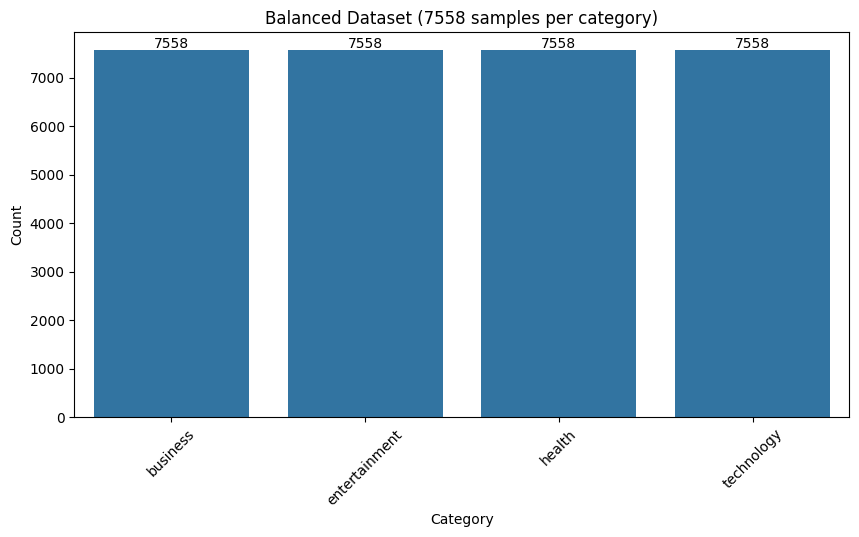

In [7]:
min_count = df['CATEGORY'].value_counts().min()

# 2. Undersample each category to match min_count
balanced_dfs = []
for category in df['CATEGORY'].unique():
    category_df = df[df['CATEGORY'] == category]
    undersampled_df = resample(
        category_df,
        replace=False,  # Undersampling (no replacement)
        n_samples=min_count,
        random_state=42  # For reproducibility
    )
    balanced_dfs.append(undersampled_df)

# 3. Combine balanced data
df_balanced = pd.concat(balanced_dfs)

# 4. Plot results with decoded labels
plt.figure(figsize=(10,5))
ax = sns.countplot(x='CATEGORY', data=df_balanced)
plt.xticks(ticks=range(len(label_encoder.classes_)),
           labels=label_encoder.classes_,
           rotation=45)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title(f'Balanced Dataset ({min_count} samples per category)')

# Add count annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0,5),
                textcoords='offset points')
plt.show()

In [8]:
df_balanced["CATEGORY"].value_counts()

,count
CATEGORY,
0,7558
1,7558
2,7558
3,7558


**Train/test split**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_balanced['PROCESSED_CONTENT'], df_balanced['CATEGORY'], test_size=0.2, random_state=42)

**Feature Extractions Using Bag of Words [BoW]**

In [10]:
#Bag of words
tfidvectorizer = TfidfVectorizer(min_df=2,
                                 ngram_range=(2,2),
                                 smooth_idf=True,
                                 use_idf=True)
train_features = tfidvectorizer.fit_transform(X_train)
test_features = tfidvectorizer.transform(X_test)

**Support Vector Machines**

Support Vector Machine using TF-IDF

Accuracy:  94.12932032412766 

Classification Report

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1486
           1       0.96      0.97      0.97      1580
           2       0.94      0.93      0.93      1456
           3       0.94      0.93      0.94      1525

    accuracy                           0.94      6047
   macro avg       0.94      0.94      0.94      6047
weighted avg       0.94      0.94      0.94      6047



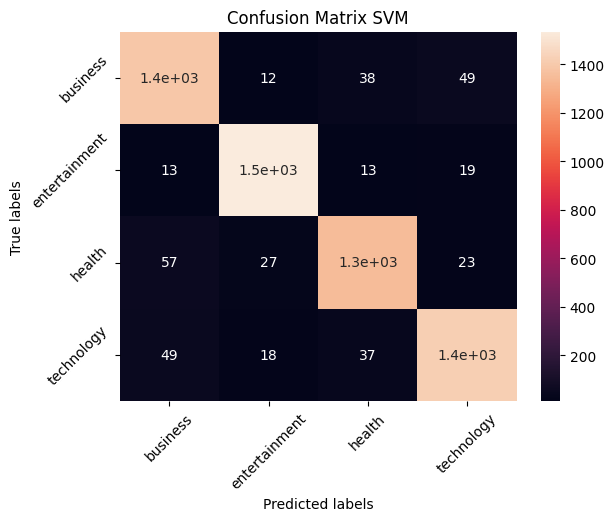

In [11]:
#Support Vector Machines

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(train_features,y_train)
predictions_SVM = SVM.predict(test_features)

print("Support Vector Machine using TF-IDF\n")
print("Accuracy: ",accuracy_score(predictions_SVM, y_test)*100,"\n")
print("Classification Report\n")
print(classification_report(y_test ,predictions_SVM))


#Plotting the confusion matrix
cm = confusion_matrix(y_test, predictions_SVM)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix SVM');
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);
ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);

**Logistic Regression**

Logistic Regression using TF-IDF

Accuracy:  93.66628080039689 

Classification Report

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1486
           1       0.96      0.97      0.97      1580
           2       0.94      0.92      0.93      1456
           3       0.93      0.93      0.93      1525

    accuracy                           0.94      6047
   macro avg       0.94      0.94      0.94      6047
weighted avg       0.94      0.94      0.94      6047



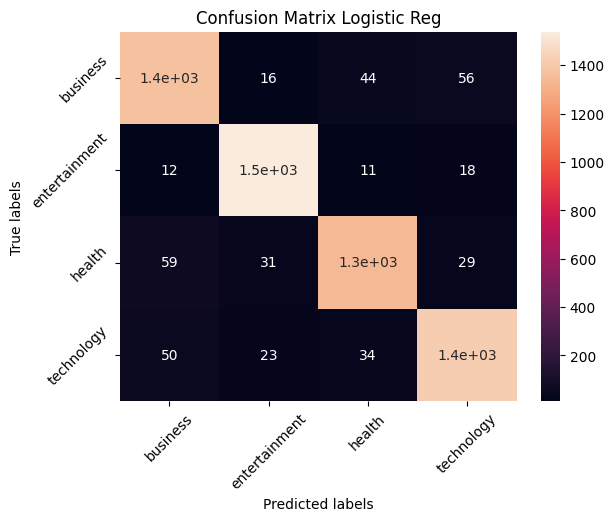

In [12]:
#Logistic Regression

logRegModel = LogisticRegression()
logRegModel.fit(train_features, y_train)
predictions_lr = logRegModel.predict(test_features)

print("Logistic Regression using TF-IDF\n")
print("Accuracy: ",accuracy_score(predictions_lr, y_test)*100,"\n")
print("Classification Report\n")
print(classification_report(y_test,predictions_lr))


#Plotting the confusion matrix
cm = confusion_matrix(y_test, predictions_lr)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix Logistic Reg');
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);
ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);

**Naive Bayes**

MultiNomial Naive Bayes using TF-IDF

Accuracy:  93.38514966098892 

Classification Report

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1486
           1       0.95      0.97      0.96      1580
           2       0.94      0.91      0.93      1456
           3       0.93      0.93      0.93      1525

    accuracy                           0.93      6047
   macro avg       0.93      0.93      0.93      6047
weighted avg       0.93      0.93      0.93      6047



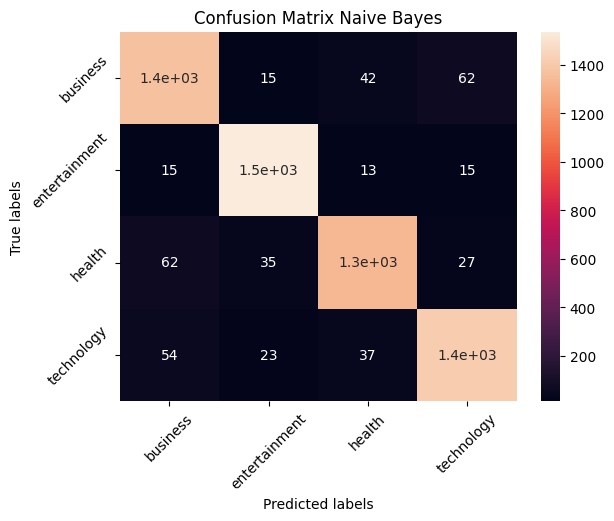

In [13]:
#Naive Bayes
mnb = MultinomialNB()
mnb.fit(train_features,y_train)
predictions_mnb = mnb.predict(test_features)

print("MultiNomial Naive Bayes using TF-IDF\n")
print("Accuracy: ",accuracy_score(predictions_mnb, y_test)*100,"\n")
print("Classification Report\n")
print(classification_report(y_test,predictions_mnb))


#Plotting the confusion matrix
cm = confusion_matrix(y_test, predictions_mnb)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix Naive Bayes');
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);
ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);

**Random Forest**

Random Forest using TF-IDF

Accuracy:  88.3578634033405 

Classification Report

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1486
           1       0.86      0.97      0.91      1580
           2       0.90      0.85      0.87      1456
           3       0.92      0.83      0.87      1525

    accuracy                           0.88      6047
   macro avg       0.89      0.88      0.88      6047
weighted avg       0.89      0.88      0.88      6047



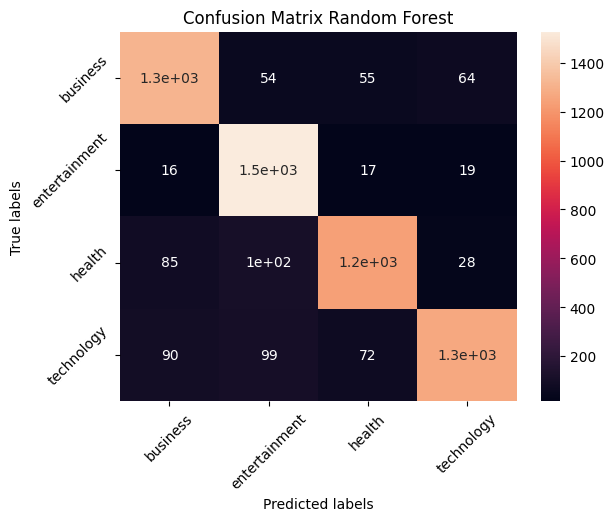

In [14]:
#Random Forest
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(train_features,y_train)
predictions_rfc = rfc.predict(test_features)

print("Random Forest using TF-IDF\n")
print("Accuracy: ",accuracy_score(predictions_rfc, y_test)*100,"\n")
print("Classification Report\n")
print(classification_report(y_test,predictions_rfc))


#Plotting the confusion matrix
cm = confusion_matrix(y_test, predictions_rfc)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix Random Forest');
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);
ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);

**K-Nearest-Neigbour**

In [15]:
def knn(p,n,vector_type, metric=None):

    X_train, X_test, y_train, y_test = train_test_split(df_balanced['PROCESSED_CONTENT'], df_balanced['CATEGORY'], test_size=0.2, random_state=42)

    knn = neighbors.KNeighborsClassifier(n_neighbors=n, weights='distance', algorithm='auto', metric=metric, p=p, n_jobs=1)

    if vector_type == 'BoW':
        vectorizer = CountVectorizer(analyzer='word', input='content')
        train_vec = vectorizer.fit_transform(X_train)
        test_vec = vectorizer.transform(X_test)

    elif vector_type == 'tfidf':
        vectorizer =  TfidfVectorizer(analyzer='word', input='content')
        train_vec = vectorizer.fit_transform(X_train)
        test_vec = vectorizer.transform(X_test)



    knn.fit(train_vec, y_train)
    predicted = knn.predict(test_vec)
    acc = metrics.accuracy_score(y_test, predicted)
    print('Accuracy: KNN with {}, neighbors: {}, distance metric: {}  = {}'.format(vector_type, n,metric, str(acc * 100) + '%'))

**Cosine Similarities**

In [16]:
for n_neighbor in range(2,8,1):
    knn(2,n_neighbor,'tfidf','cosine')

Accuracy: KNN with tfidf, neighbors: 2, distance metric: cosine  = 94.41045146353564%
Accuracy: KNN with tfidf, neighbors: 3, distance metric: cosine  = 94.57582272201091%
Accuracy: KNN with tfidf, neighbors: 4, distance metric: cosine  = 94.69158260294361%
Accuracy: KNN with tfidf, neighbors: 5, distance metric: cosine  = 94.59235984785845%
Accuracy: KNN with tfidf, neighbors: 6, distance metric: cosine  = 94.52621134446834%
Accuracy: KNN with tfidf, neighbors: 7, distance metric: cosine  = 94.31122870845047%


**Euclidean**

In [17]:
for n_neighbor in range(2,8,1):
    knn(2,n_neighbor,'tfidf','euclidean')

Accuracy: KNN with tfidf, neighbors: 2, distance metric: euclidean  = 94.41045146353564%
Accuracy: KNN with tfidf, neighbors: 3, distance metric: euclidean  = 94.52621134446834%
Accuracy: KNN with tfidf, neighbors: 4, distance metric: euclidean  = 94.67504547709608%
Accuracy: KNN with tfidf, neighbors: 5, distance metric: euclidean  = 94.6254340995535%
Accuracy: KNN with tfidf, neighbors: 6, distance metric: euclidean  = 94.54274847031586%
Accuracy: KNN with tfidf, neighbors: 7, distance metric: euclidean  = 94.31122870845047%
